In [1]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import image_helper as ih

/Users/arseniybileckiy/PycharmProjects/Database3/venv/lib/python3.9/site-packages/sklearn/utils/__init__.py:21: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.1)
  from scipy.sparse import issparse


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
fileDics = ih.GetFileDics()

/Users/arseniybileckiy/PycharmProjects/Database3/ML_4c/HW_7/image_helper.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  totalPixels = np.array(internalDic)[:,0].sum()


In [37]:
p = [dic for dic in fileDics.values()]

[{21760: 0.6814685314685315,
  11184640: 0.17195804195804196,
  85: 0.11573426573426573},
 {16777215: 0.26153846153846155, 11141120: 0.3795726495726496, 43520: 0.33},
 {11184810: 0.32, 5570560: 0.32, 0: 0.32},
 {16777215: 0.39265432098765435,
  21760: 0.2777777777777778,
  11141120: 0.2777777777777778},
 {16777215: 0.32, 11141120: 0.33, 85: 0.33},
 {16777215: 0.39266666666666666, 21930: 0.5289333333333334},
 {21760: 0.7424,
  11162880: 0.09313333333333333,
  11141120: 0.07253333333333334,
  0: 0.0768},
 {16777215: 0.06345679012345679,
  170: 0.19012345679012346,
  21760: 0.2588888888888889,
  11141120: 0.1797530864197531,
  0: 0.2588888888888889},
 {21760: 0.27283950617283953,
  11184810: 0.02648148148148148,
  16777215: 0.33858024691358024,
  11141120: 0.3333333333333333},
 {16776960: 0.169125, 22015: 0.8175},
 {16777215: 0.024444444444444446,
  11184640: 0.24172839506172838,
  85: 0.6832716049382717},
 {21760: 0.92, 11184810: 0.03},
 {16777215: 0.2388888888888889,
  11141120: 0.16111

In [31]:
uniqueColors = set(x for dic in fileDics.values() for x in dic) # всех цветов без дубликатов

In [42]:
len(uniqueColors)

27

In [35]:
uniqueColors

{0,
 85,
 170,
 21760,
 21845,
 21930,
 22015,
 43520,
 43690,
 5570560,
 5592320,
 5592405,
 5592490,
 5614165,
 5614250,
 5614335,
 11141120,
 11162880,
 11162965,
 11184640,
 11184725,
 11184810,
 16711680,
 16733440,
 16755200,
 16776960,
 16777215}

In [6]:
dicFull = {key:0 for key in sorted(uniqueColors)}

In [7]:
fileFullDics = {}

In [8]:
for item in fileDics.items():
    file, dic = item
    dicFullCopy = dicFull.copy()
    for key in dic:
        dicFullCopy[key] = dic[key]
    fileFullDics[file] = list(dicFullCopy.values())# + [len(dic)/20]

In [9]:
listOfVectors = list(fileFullDics.values())

In [40]:
listOfVectors

[[0,
  0.11573426573426573,
  0,
  0.6814685314685315,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.17195804195804196,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.33,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.3795726495726496,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.26153846153846155],
 [0.32,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.32,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.32,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0.2777777777777778,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.2777777777777778,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.39265432098765435],
 [0,
  0.33,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.33,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.32],
 [0,
  0,
  0,
  0,
  0,
  0.5289333333333334,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.39266666

In [ ]:
def my_scorer_dbscan(estimator, X, y=None):
    estimator.fit(X)
    return -1 * np.count_nonzero(estimator.labels_ == -1) + 35 * max(estimator.labels_)

In [ ]:
def my_scorer_dbscan(estimator, X, y=None):
    estimator.fit(X)
    return -1 * np.count_nonzero(estimator.labels_ == -1) + 35 * max(estimator.labels_)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ "eps": np.linspace(0.1, 0.5, 40),
        "min_samples": [3] }]

In [43]:
dbs=DBSCAN() 
grid_search = GridSearchCV(dbs, param_grid, cv=3, scoring=my_scorer_dbscan)
grid_search.fit(listOfVectors);

print(grid_search.best_params_)

clustering =grid_search.best_estimator_.fit(listOfVectors)
clustering.labels_, max(clustering.labels_)

ValueError: Number of rows must be a positive integer, not 0

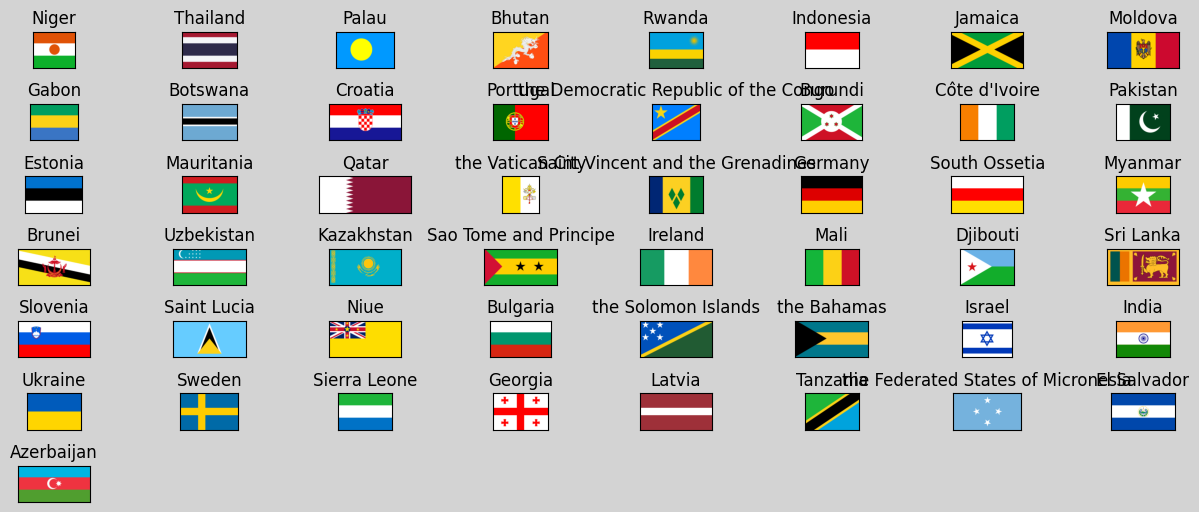

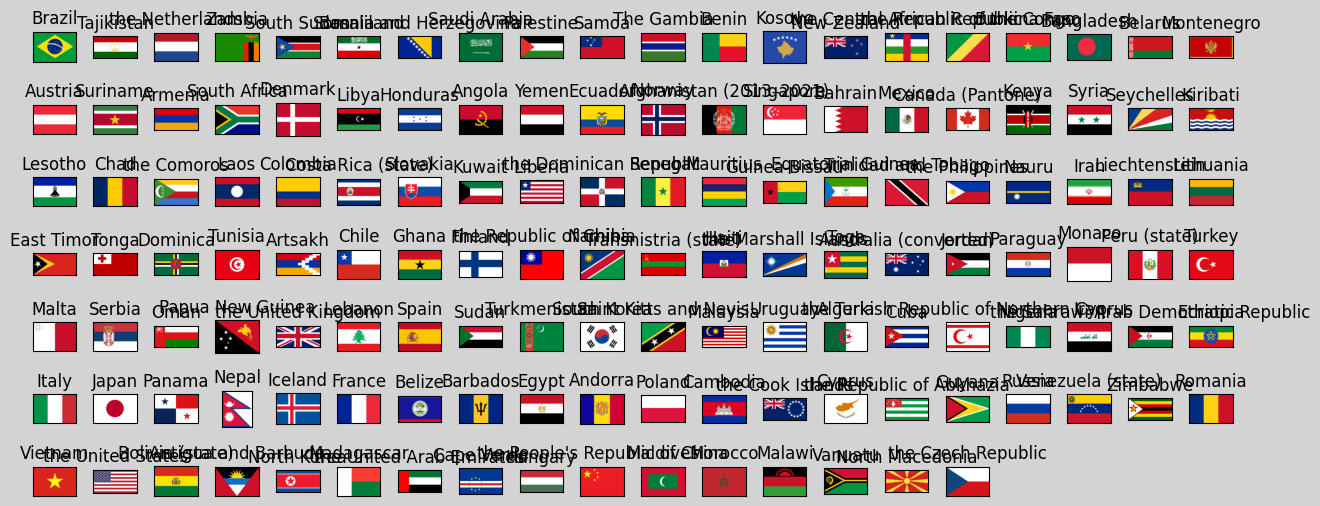

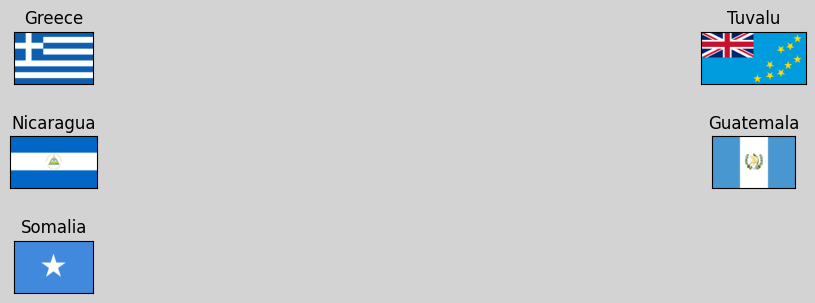

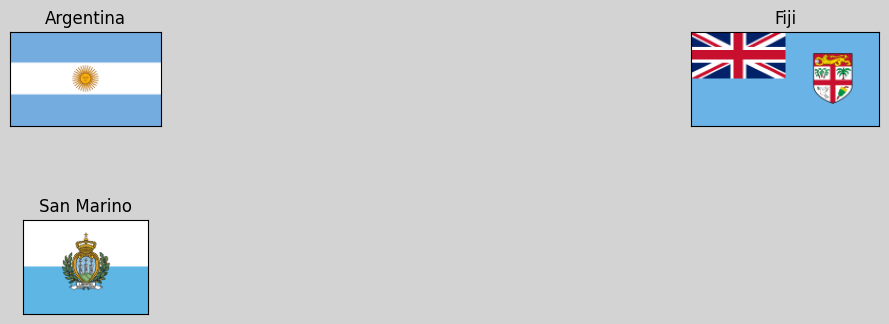

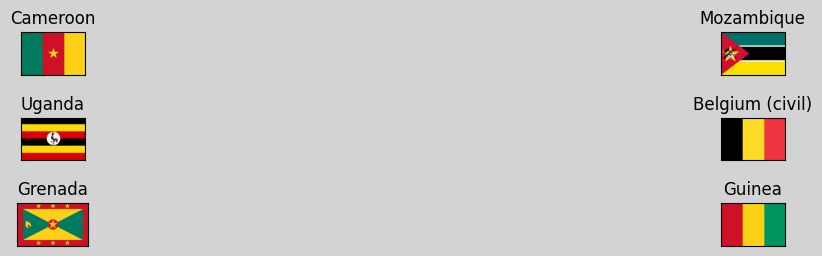

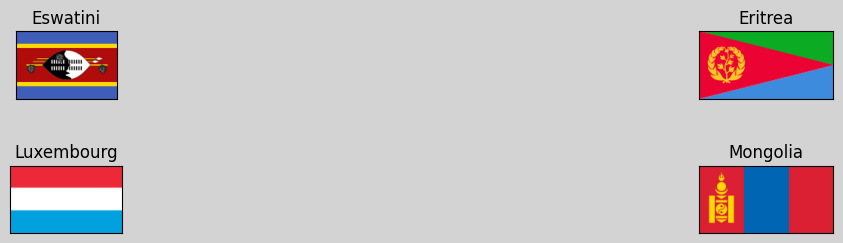

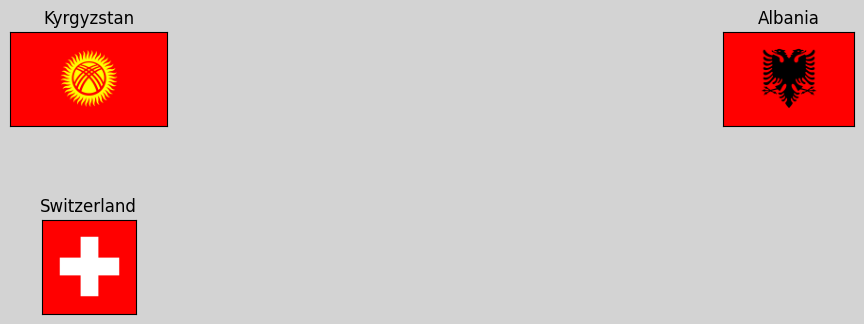

<Figure size 640x480 with 0 Axes>

In [15]:
for groupId in range(-1, max(clustering.labels_)+2):
    group = np.array(list(fileDics.keys()))[clustering.labels_ == groupId]
    ih.PrintGroup(group)

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ "eps": np.linspace(0.1, 0.5, 40),
        "min_samples": [3] }]

dbs=DBSCAN() 
grid_search = GridSearchCV(dbs, param_grid, cv=3, scoring=my_scorer_dbscan)
grid_search.fit(listOfVectors);

In [45]:
print(grid_search.best_params_)

{'eps': 0.3358974358974359, 'min_samples': 3}


In [46]:
clustering =grid_search.best_estimator_.fit(listOfVectors)
clustering.labels_, max(clustering.labels_)

(array([ 0, -1, -1,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1,
         0,  0,  2,  0, -1,  0,  0,  3,  0, -1,  0,  1,  3, -1,  0,  0,  4,
        -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  2,
        -1,  4,  0,  0, -1,  3,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  3, -1,  0,  0,  0, -1,  0,
        -1,  0,  0, -1,  0,  0, -1,  0,  4,  3,  0,  0, -1,  0, -1,  0,  0,
         0,  3, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,
         0,  2,  0,  0,  4, -1,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,
         0,  0, -1, -1,  0,  0,  0, -1, -1,  0, -1,  1,  0, -1, -1,  0, -1,
         0,  5,  0,  0,  0, -1,  0,  5,  0,  0, -1,  0,  0,  0,  0,  0,  1,
         0, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
         0,  0]),
 5)

In [16]:
ncl = 40
inertia = [KMeans(n_clusters=i, init='k-means++', random_state=1).fit(listOfVectors).inertia_ for i in range(1,ncl)]

([<matplotlib.axis.XTick at 0x7ff31c421040>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39')])

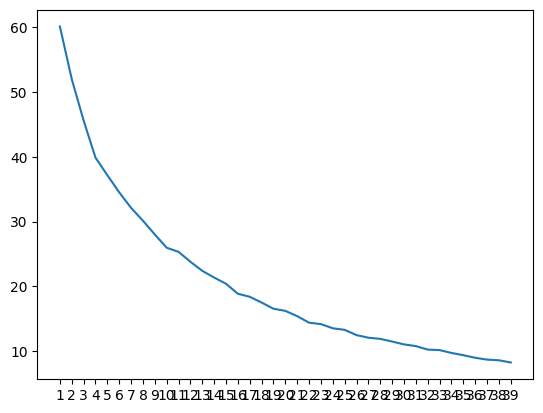

In [17]:
plt.plot(range(1,ncl), inertia)
plt.xticks(range(1,ncl))

In [47]:
ncl = 60
from sklearn.metrics import silhouette_samples, silhouette_score
scores = []
for n_clusters in range(2,ncl):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(listOfVectors)
    scores.append(silhouette_score(listOfVectors, cluster_labels))

([<matplotlib.axis.XTick at 0x7ff324ac4700>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46, 0, '46'),
  Text(47, 0, '47'),
  Tex

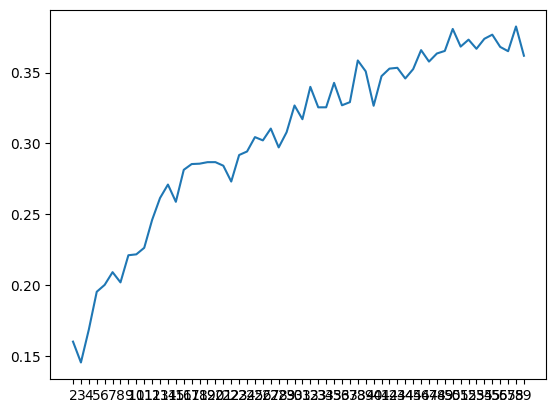

In [48]:
plt.plot(range(2,ncl), scores)
plt.xticks(range(2,ncl))

In [49]:
kmeans = KMeans(n_clusters=65, init='k-means++').fit(listOfVectors)
kmeans.labels_

array([ 7, 20, 39, 17,  0, 10, 44, 50, 17, 12,  4, 44, 38, 10,  3, 13, 32,
        2,  4, 26,  4, 51, 13,  2, 15, 36, 40, 44, 10, 15, 54, 36, 64,  5,
       60, 48, 17, 58, 13, 48,  8,  4, 51, 47, 21, 23, 18, 48, 50, 28, 26,
       22, 52, 48, 17, 55, 53, 48, 50, 21, 12, 20, 13, 59, 46,  0, 22, 41,
       16, 19, 18,  0,  0, 38, 28,  0,  2, 13,  2, 17,  3, 19, 11,  4, 17,
       19,  2,  3, 34,  7, 34, 58, 28,  2, 56, 53, 15, 22,  3, 13, 14, 36,
       32, 19,  4, 54, 16,  4, 47, 38,  5, 15,  0, 28, 32, 48, 33, 34, 28,
        0, 15, 24, 17, 47,  0, 28, 29, 18, 21, 44, 25, 37,  9, 50, 22, 42,
       22, 26, 43,  0, 52, 33,  9, 57, 43, 21, 38,  2, 35, 40, 31, 17,  9,
        0, 47, 24, 28,  4,  0,  4, 49, 30,  4, 62, 10, 21, 63, 45, 41, 30,
       28, 11, 19,  4,  9, 29, 43, 11,  2,  0, 40, 18, 16, 41, 34,  0, 10,
        2, 14, 56, 47,  6, 19, 17,  1,  4, 17, 27, 34, 36, 34, 50, 50, 61,
       64,  0], dtype=int32)

/Users/arseniybileckiy/PycharmProjects/Database3/ML_4c/HW_7/image_helper.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(min(len(names),rows),max(2,width), facecolor='lightgray') #sharex=True, sharey=True,


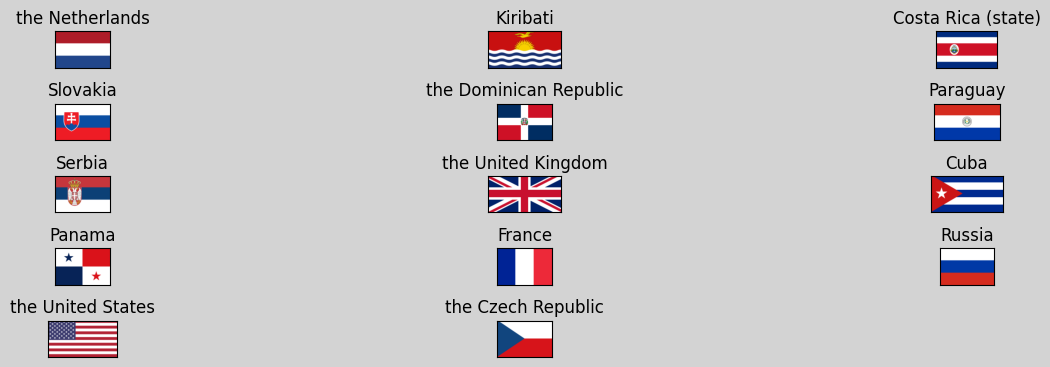

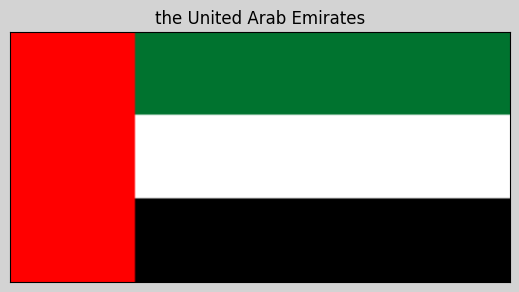

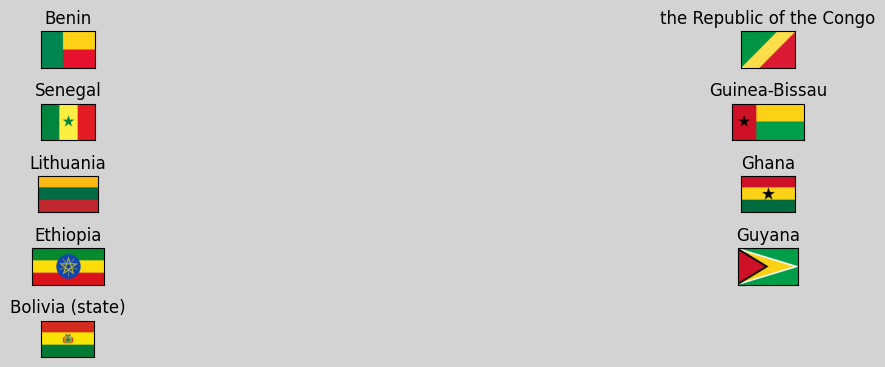

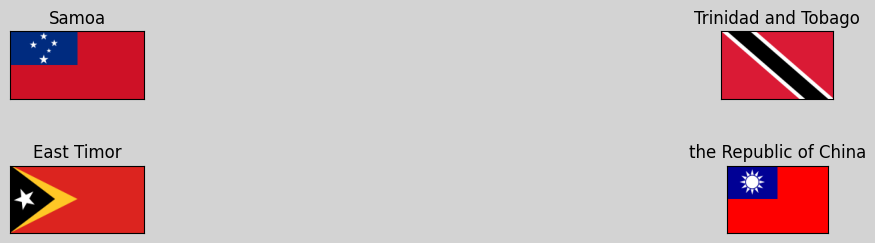

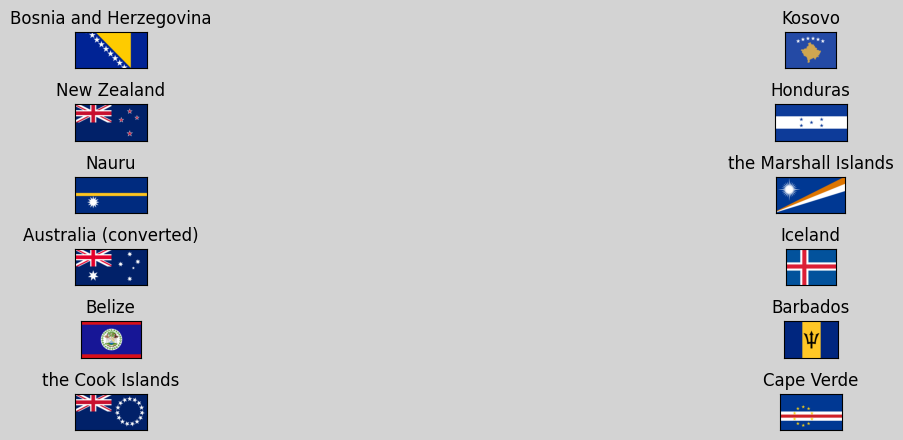

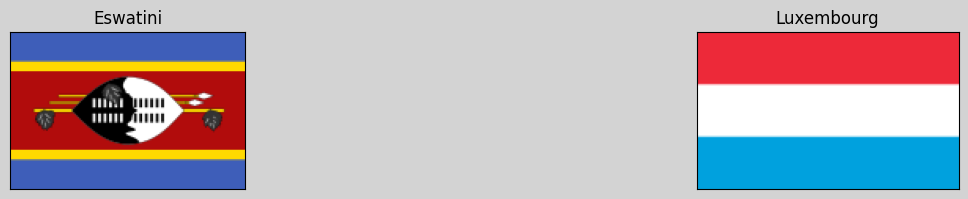

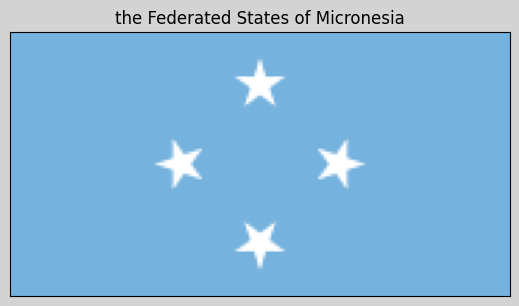

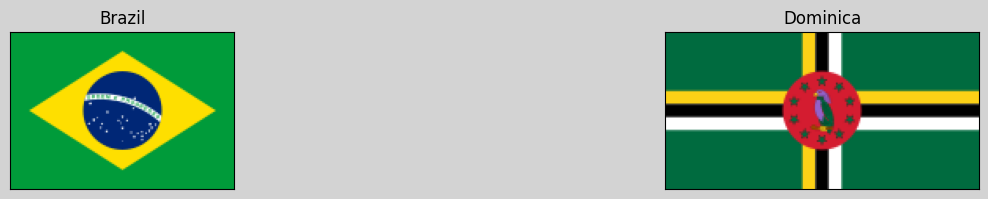

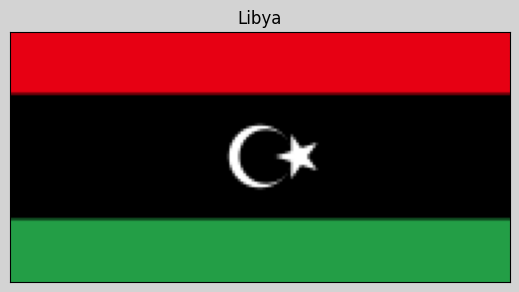

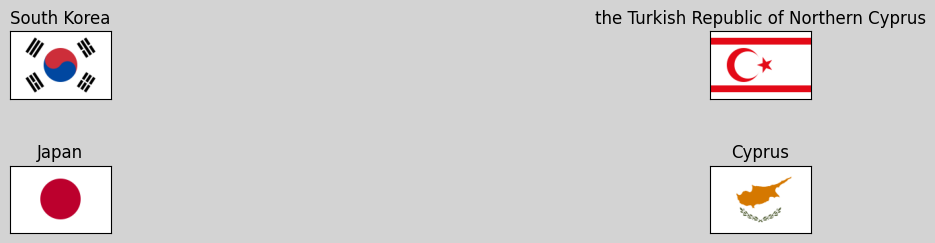

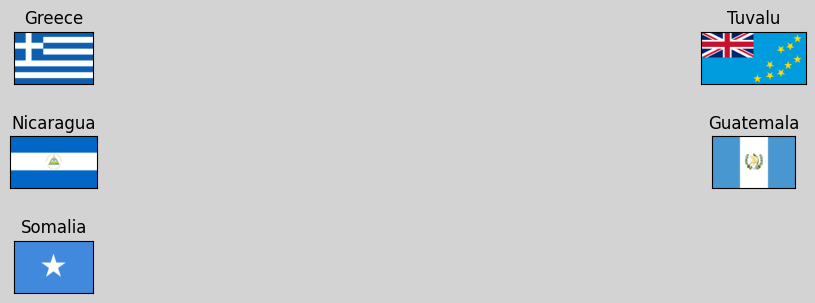

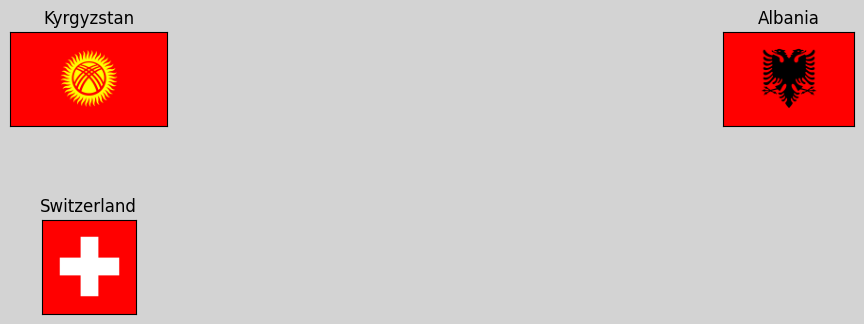

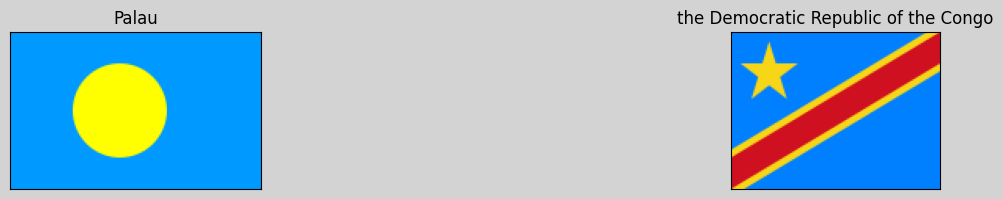

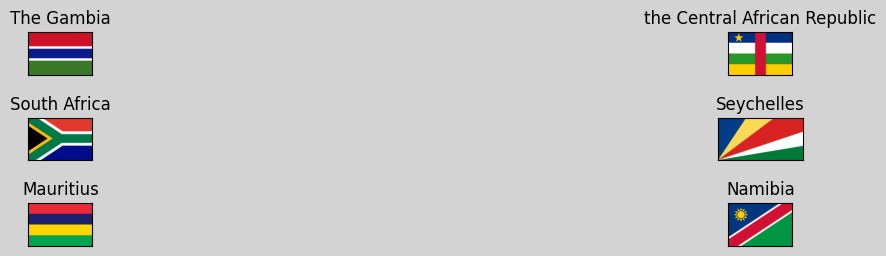

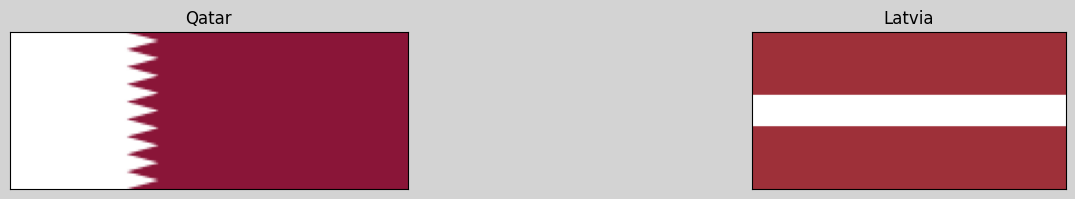

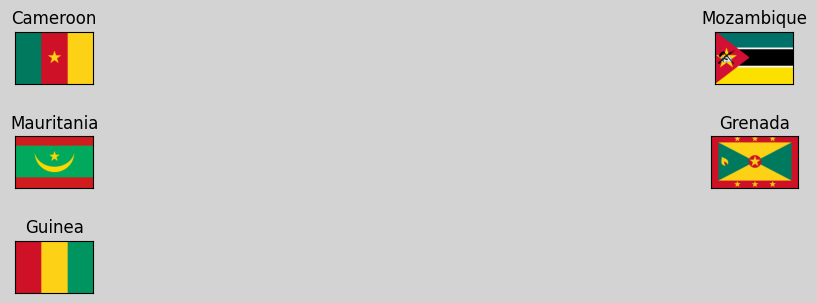

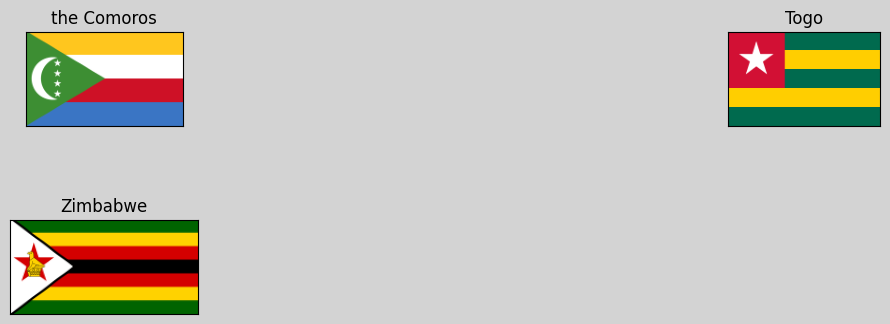

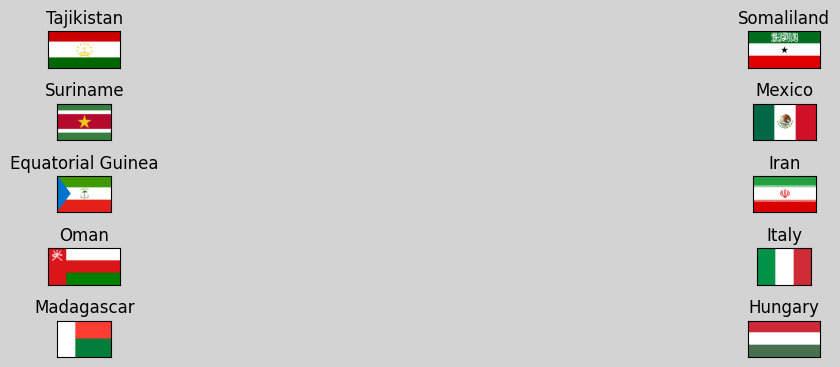

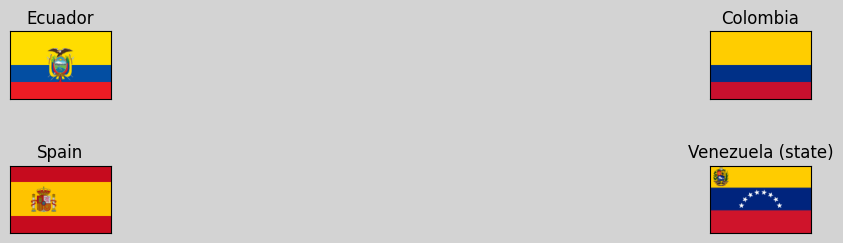

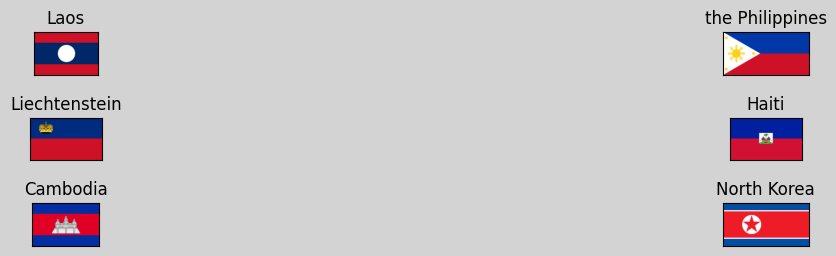

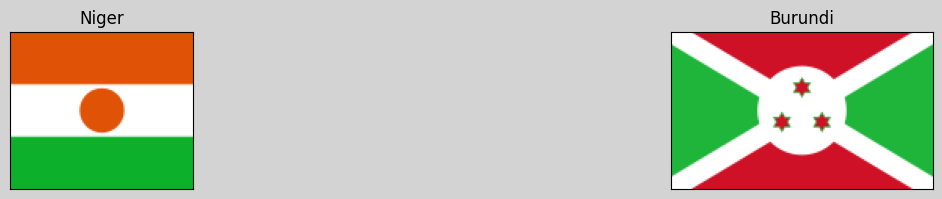

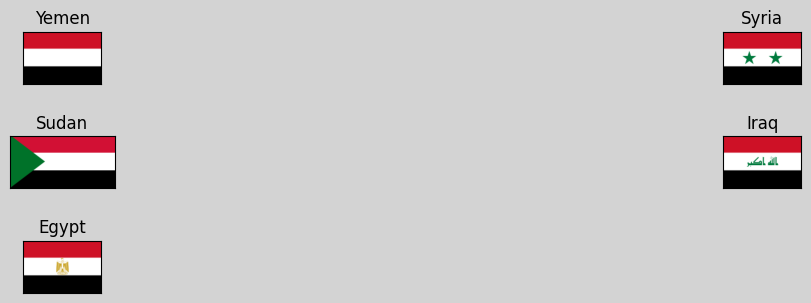

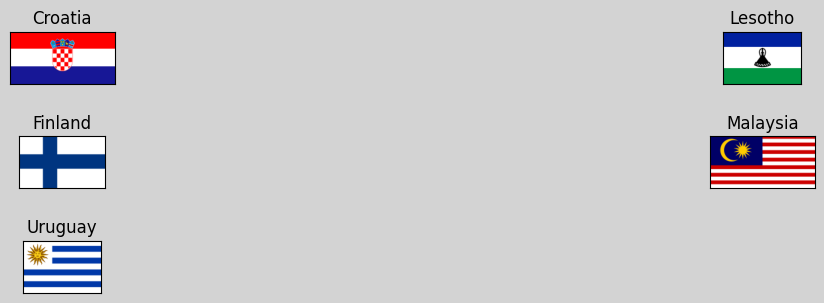

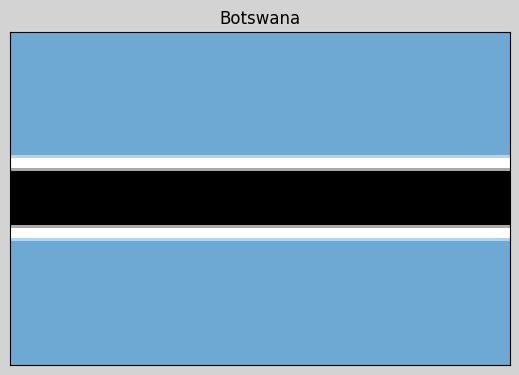

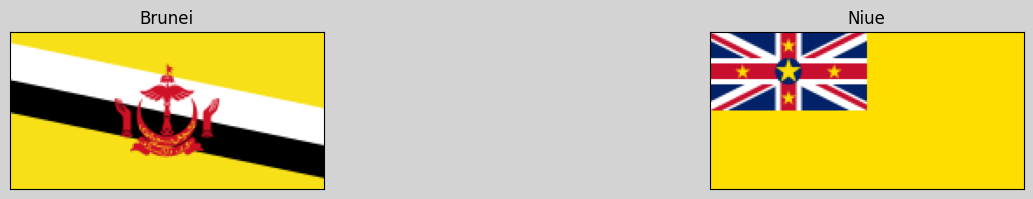

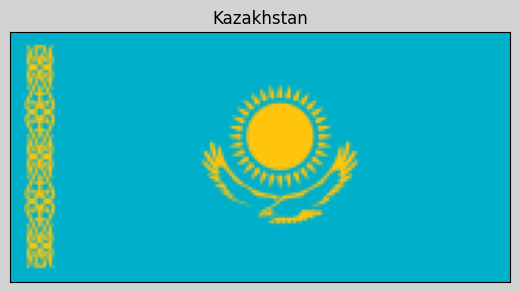

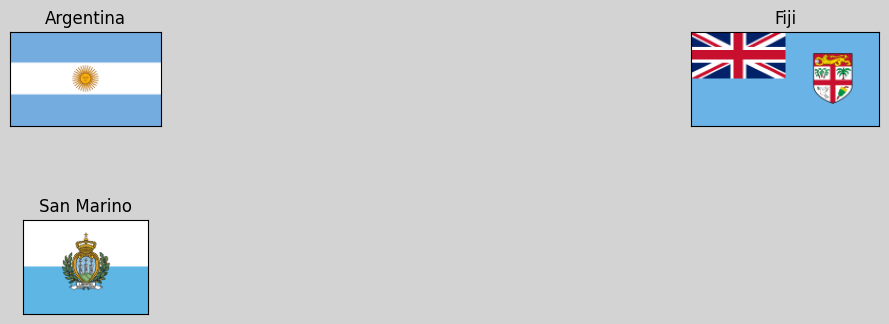

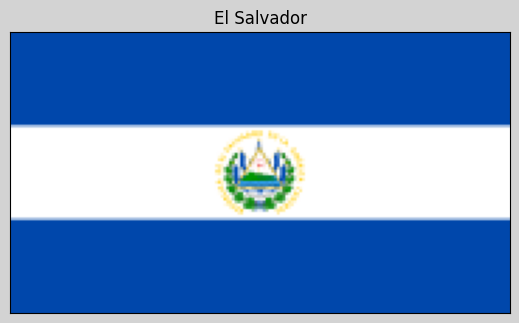

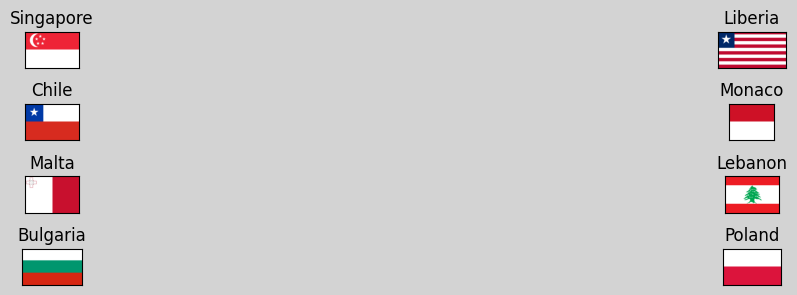

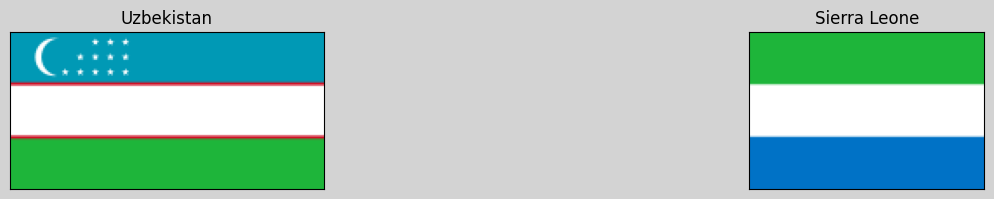

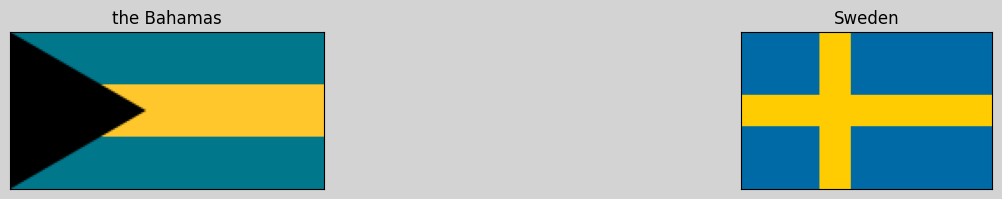

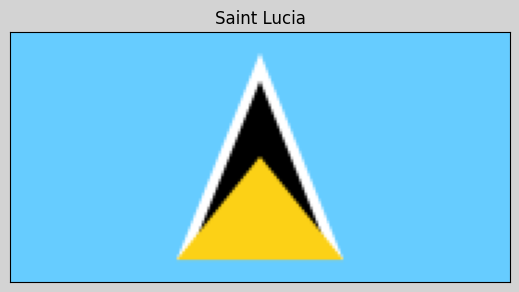

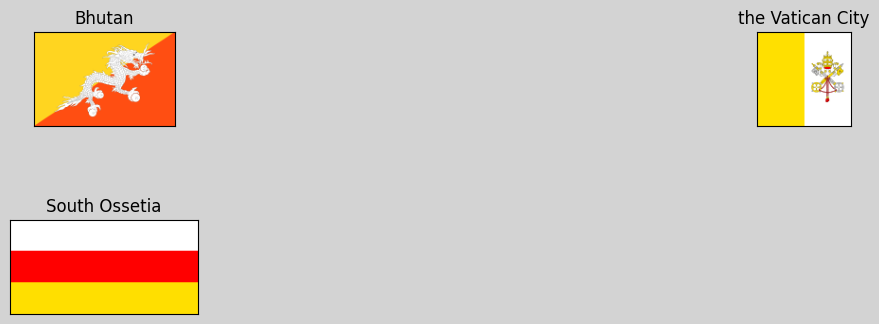

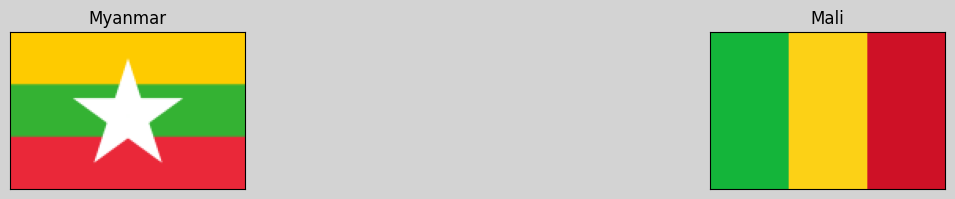

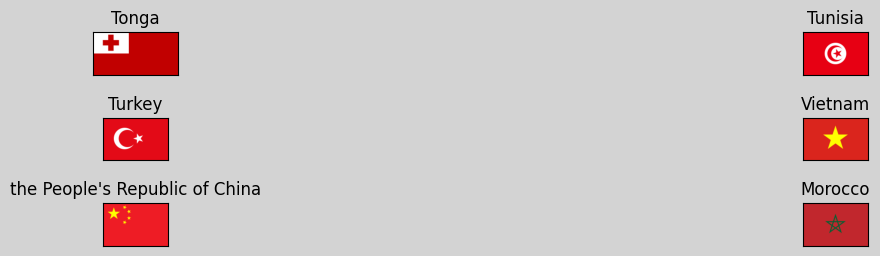

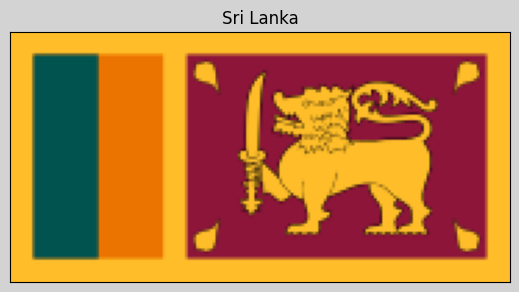

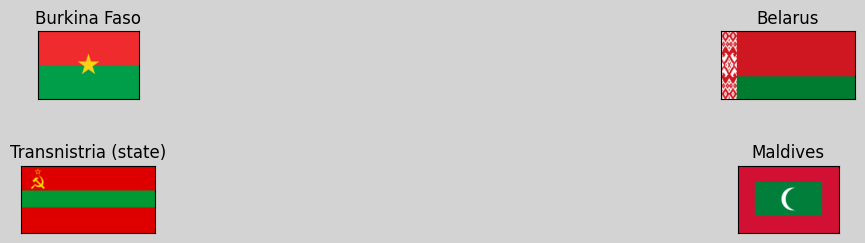

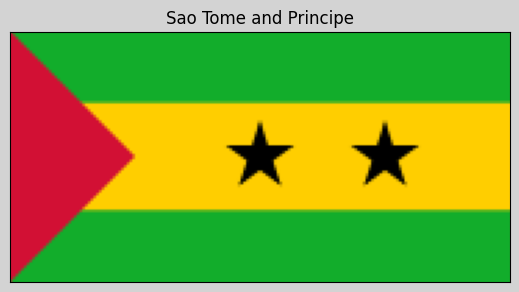

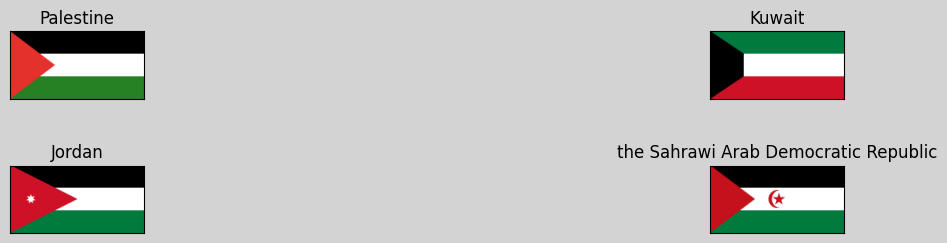

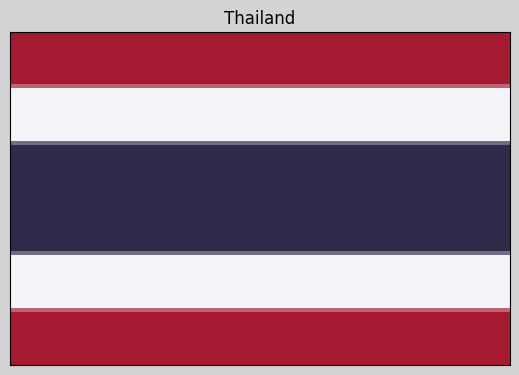

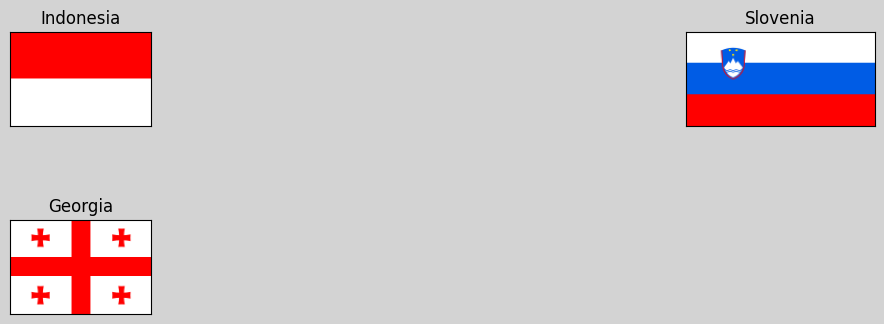

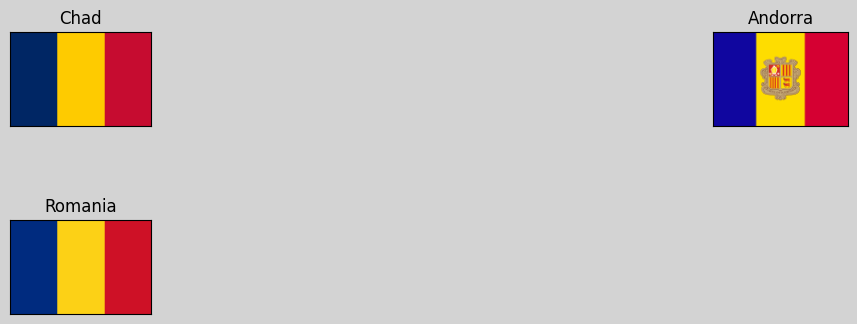

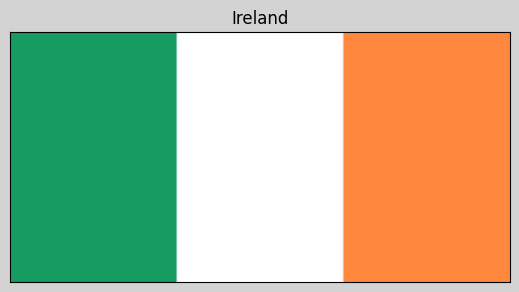

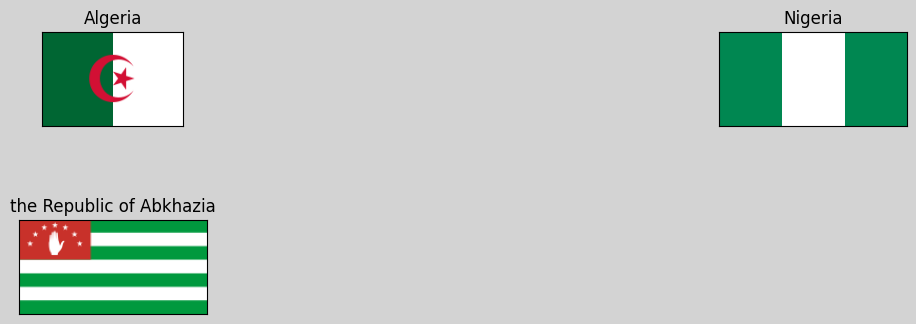

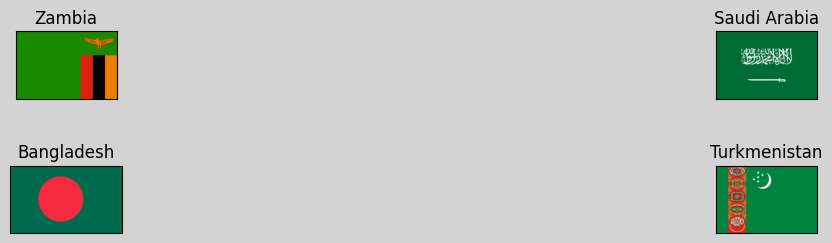

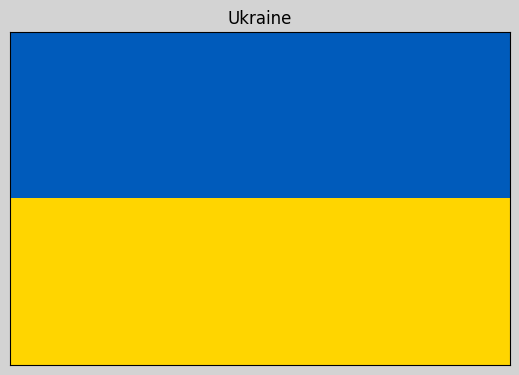

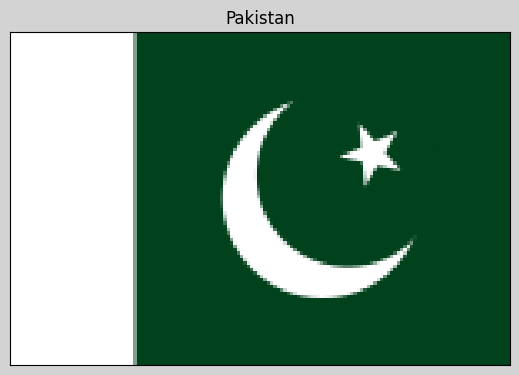

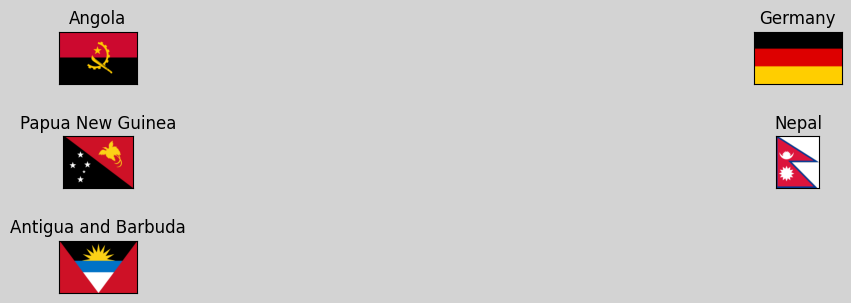

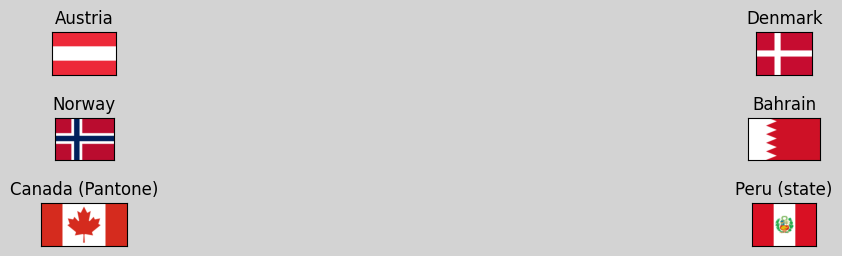

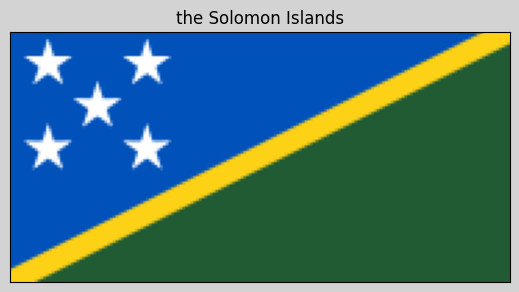

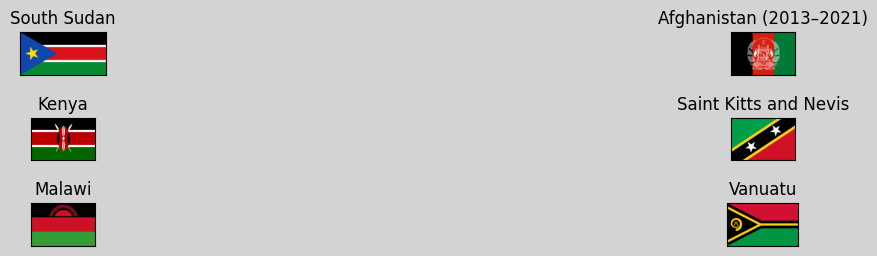

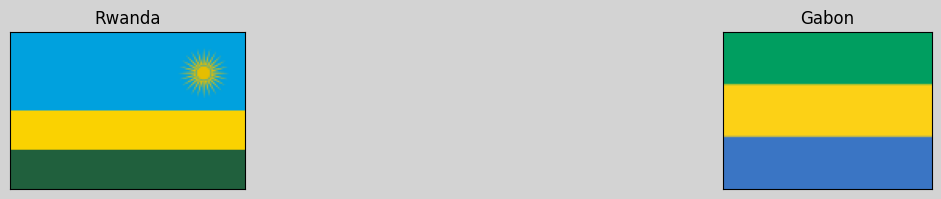

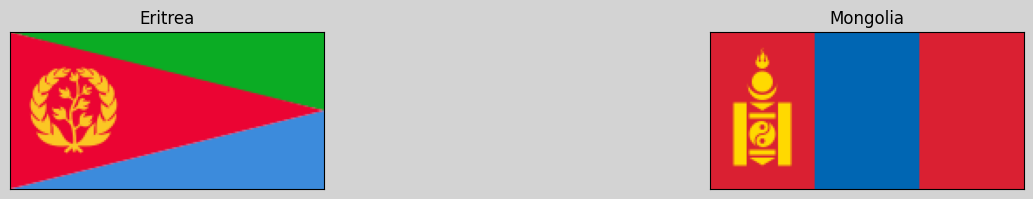

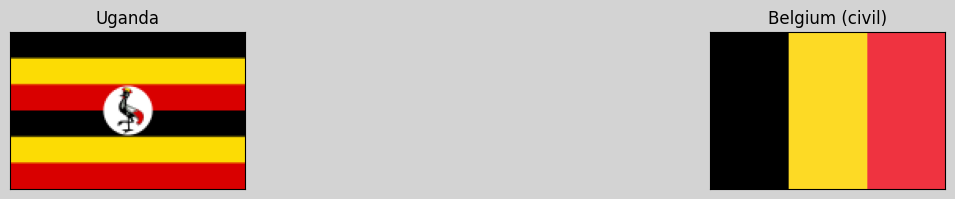

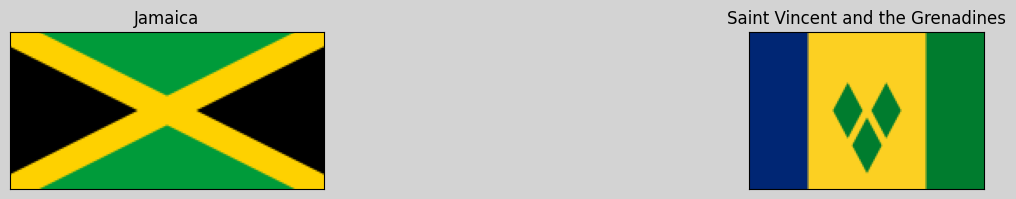

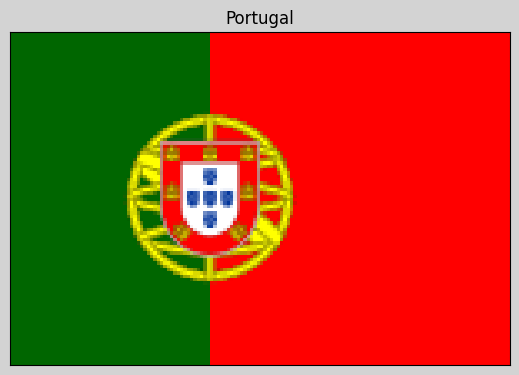

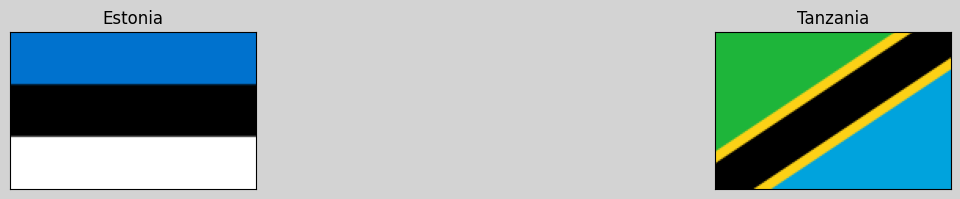

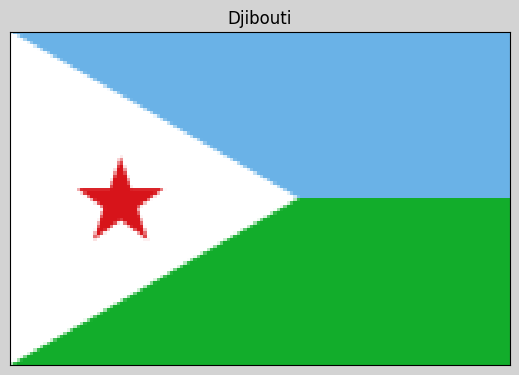

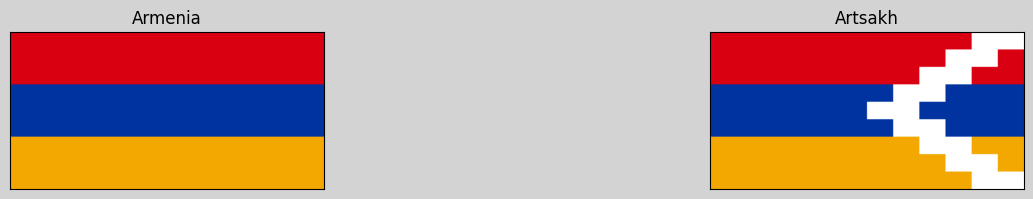

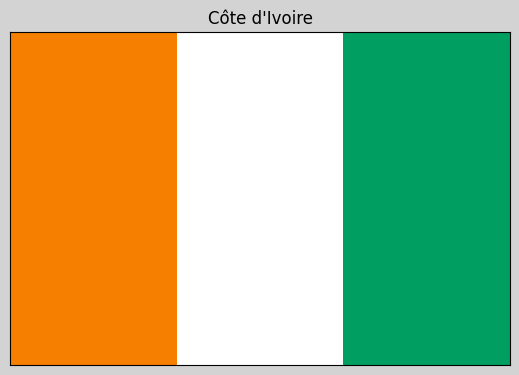

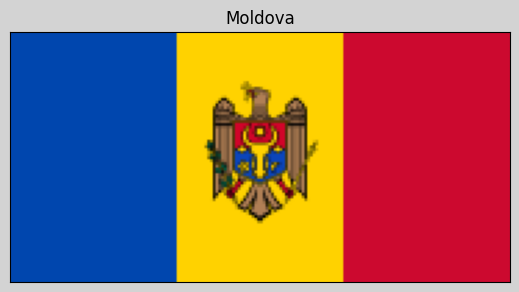

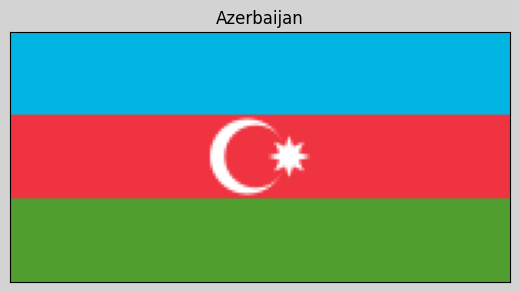

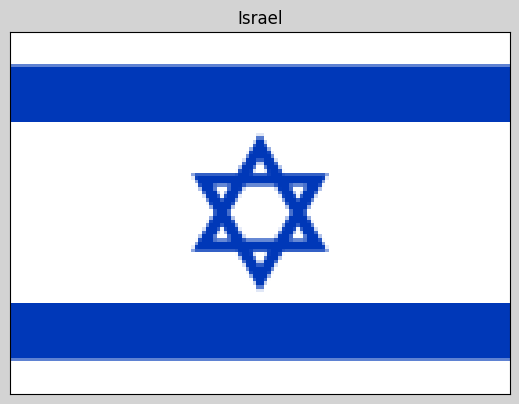

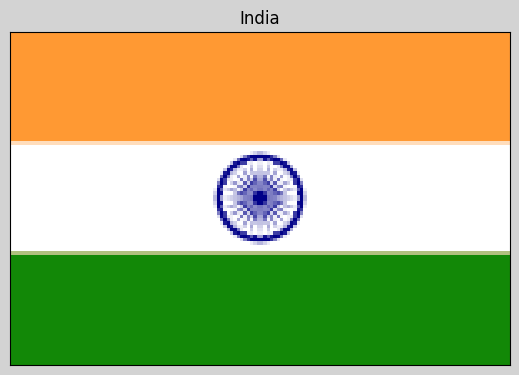

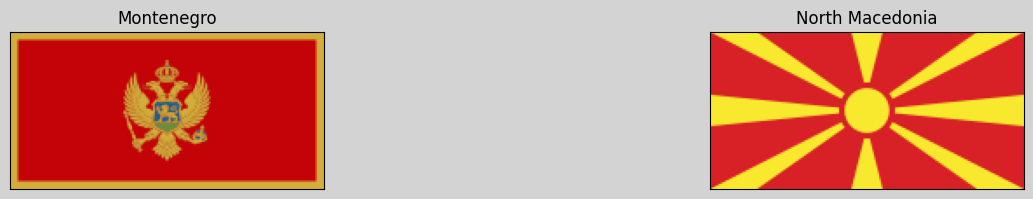

In [50]:
for groupId in range(max(kmeans.labels_)+1):
    group = np.array(list(fileFullDics.keys()))[kmeans.labels_ == groupId]
    ih.PrintGroup(group)

In [51]:
from sklearn.decomposition import PCA, KernelPCA

In [52]:
from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = [{ "degree": [1,2,3,4],
        "gamma": [0.1, 0.5, 1, 2, 3],
        "kernel": ["rbf","sigmoid"]  }]

kpca=KernelPCA(n_components=2, kernel="rbf", gamma=1, fit_inverse_transform=True, n_jobs=-1) 
grid_search = GridSearchCV(kpca, param_grid, cv=3, scoring=my_scorer)
grid_search.fit(listOfVectors)

/Users/arseniybileckiy/PycharmProjects/Database3/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arseniybileckiy/PycharmProjects/Database3/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/arseniybileckiy/PycharmProjects/Database3/venv/lib/python3.9/site-packages/sklearn/decomposition/_kernel_pca.py", line 438, in fit
    self._fit_inverse_transform(X_transformed, X)
  File "/Users/arseniybileckiy/PycharmProj

NotFittedError: All estimators failed to fit

In [54]:
print(grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
X_pca = grid_search.transform(listOfVectors)

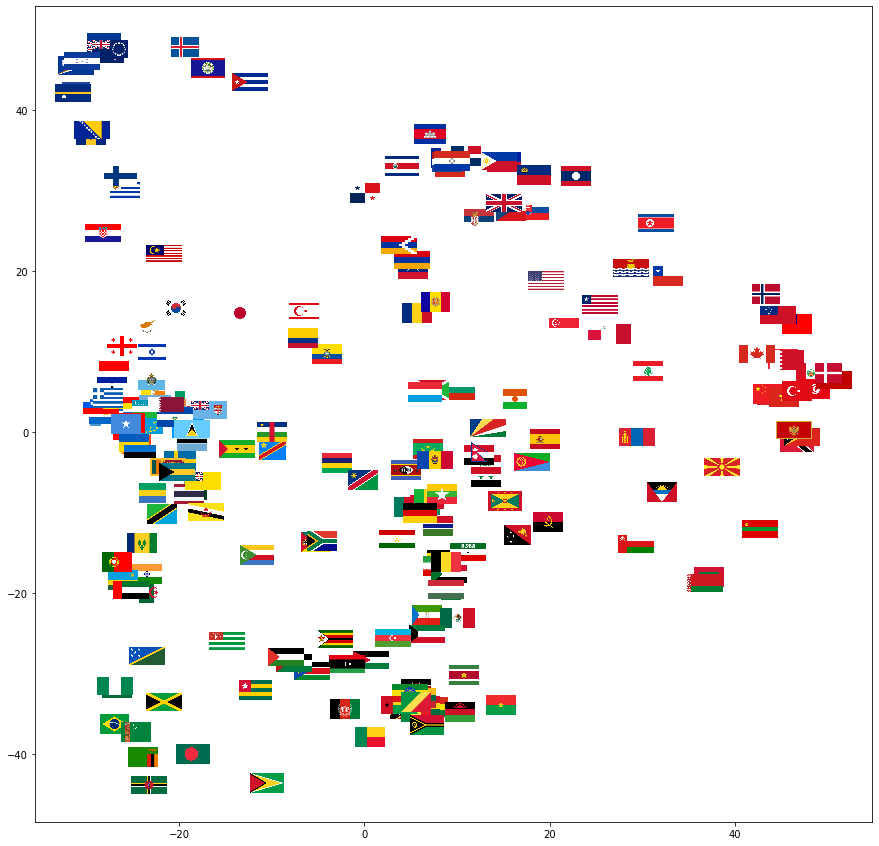

In [21]:
ih.PlotOnPlane(X_pca, fileDics.keys())